In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [49]:
Sales = pd.read_csv("data/pet_supplies_2212.csv")
Sales.head()

,product_id,category,animal,size,price,sales,rating,repeat_purchase
0,1,Food,Bird,large,51.1,1860.62,7.0,1
1,2,Housing,Bird,MEDIUM,35.98,963.60,6.0,0
2,3,Food,Dog,medium,31.23,898.30,5.0,1
3,4,Medicine,Cat,small,24.95,982.15,6.0,1
4,5,Housing,Cat,Small,26.18,832.63,7.0,1


In [50]:
Sales.shape

(1500, 8)

In [51]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   object 
 5   sales            1500 non-null   float64
 6   rating           1350 non-null   float64
 7   repeat_purchase  1500 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 93.9+ KB


In [52]:
# Sales['category'] = Sales['category'].replace('-',"Unknown")

Sales['repeat_purchase'].value_counts()

1    906
0    594
Name: repeat_purchase, dtype: int64

There are no explicit missing values. But we found 25 values of  "-" as category's values too.  those values were considered as missing values and were replaced with  "Unknown".

In [53]:
# Sales[['product_id']].duplicated().sum()
# 1500 - 1350
Sales['price'][Sales['price'] == 'unlisted'].value_counts()

unlisted    150
Name: price, dtype: int64

In [54]:
# Sales['product_id'] = Sales['product_id'].astype(str)

Sales['category'] = Sales['category'].replace('-',"Unknown")
Sales['size'][(Sales['size']=='large') | (Sales['size']=='LARGE')] = 'Large'
Sales['size'][(Sales['size']=='medium') | (Sales['size']=='MEDIUM')] = 'Medium'
Sales['size'][(Sales['size']=='small') | (Sales['size']=='SMALL')] = 'Small'
Sales['price'] = Sales['price'].replace('unlisted', np.nan)
price_med = Sales['price'].median().round(2)
Sales['price'].fillna(price_med, inplace=True)
Sales['price'] = Sales['price'].astype(float).round(2)
Sales['rating'].fillna(0, inplace=True)
Sales['rating'] = Sales['rating'].astype(int)

Sales['repeat_purchase'] = Sales['repeat_purchase'].astype(str)
Sales.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1500 non-null   int32  
 7   repeat_purchase  1500 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 88.0+ KB


C:\Users\Tomate\AppData\Local\Temp\ipykernel_22020\2378667650.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sales['size'][(Sales['size']=='large') | (Sales['size']=='LARGE')] = 'Large'
C:\Users\Tomate\AppData\Local\Temp\ipykernel_22020\2378667650.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sales['size'][(Sales['size']=='medium') | (Sales['size']=='MEDIUM')] = 'Medium'
C:\Users\Tomate\AppData\Local\Temp\ipykernel_22020\2378667650.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [55]:
# Sales['price'][Sales['price'] == 'unlisted'].value_counts()
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   product_id       1500 non-null   int64  
 1   category         1500 non-null   object 
 2   animal           1500 non-null   object 
 3   size             1500 non-null   object 
 4   price            1500 non-null   float64
 5   sales            1500 non-null   float64
 6   rating           1500 non-null   int32  
 7   repeat_purchase  1500 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 88.0+ KB


In [56]:
# Sales.category.unique()
# Sales.animal.unique()
# Sales['size'].unique()
# Sales['rating'].unique()
Sales['repeat_purchase'].unique()


array(['1', '0'], dtype=object)

# Task 1
For every column in the data:

- State whether the values match the description given in the table above.

- State the number of missing values in the column.

- Describe what you did to make values match the description if they did not match.


*Solution*

**product_id**: There are 1500 unique values that match the description given. There are no missing values.

**category**: There were 6 unique values(Housing,Food, Toys, Equipment,Medicine, Accessory). There are no explicit missing values. But we found 25 values of  "-" as category's values too.  those values were considered as missing values and were replaced with  "Unknown".

**animal**: There were 4 unique values(Dog, Cat,Fish, Bird) that matches the four given in the data dictionary. There were no missing values so no changes were made to this column. 

**size**: The unique values of this column were 9 (large', 'MEDIUM','medium','small', 'Small', 'Large', 'SMALL','Medium', 'LARGE'), it's problem of writing, then: 
  *  [large,LARGE] were replaced by Large
  *  [medium,MEDIM] were replaced by Medium
  *  [smal,SMALL] were replaced by Small

. There were no missing values. 

**price**: There are no explicit missing values. But **price**'s data type is **object** instead of **float** as it said in description.Indeed, it's because there were 150 values as string ('unlisted') in the data, those values were considered as missing values and were replaced with the median, the data type were transformed into float.

**sales**: this columns's decription match with the description. There were no missing values and no changes were made to this column. 

**rating**: the data type not matched with the description, then from float, it were transformed into integer. there were 150(1500 - 1350) missing values, then they were replaced with 0.

**repeat_purcharse**: The values were in 0 or 1, but the data type was integer, the it was transformed into nominal.there were no missing values.


# Task 2

Create a visualization that shows how many products are repeat purchases. Use the visualization to:

   - State which category of the variable repeat purchases has the most
    observations
   - Explain whether the observations are balanced across categories of the variable repeat purchases

*Solution* 

![Range](Repeat_purchases.png)

The graphic above shows the distribution of products based on whether they were purchased repeatedly or not.

We observe that the categories are unbalanced. The majority of products sold are repeatedly purchased products. This suggests that these types of products are more appreciated by customers.In fact,  with over 60% (906) are purchased repeatedly again about 40% (594) that are not.

We could think PetMind should focus more on the products that are purchased repeatedly, but we have to be careful because that graphic don't say anything about PetMind's profit. More analysis shoud be done


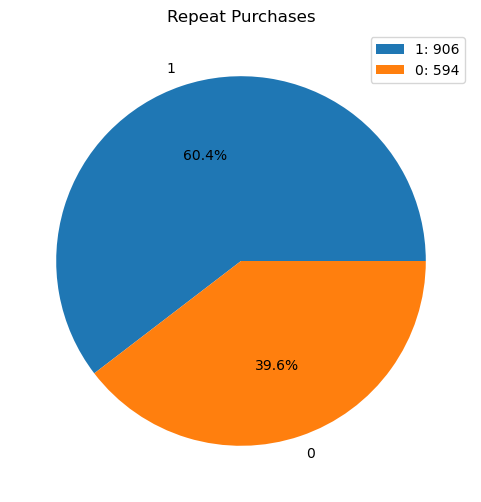

In [57]:
repeat_purchase_counts = Sales['repeat_purchase'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(repeat_purchase_counts, labels=repeat_purchase_counts.index, autopct='%1.1f%%')
plt.title('Repeat Purchases')
plt.legend(labels=['{}: {}'.format(index, count) for index, count in repeat_purchase_counts.items()])
plt.show()

On constate que la plupart des produits vendus sont des produits achetés de façon repetitives. Cela laisse penser que ces types de produits plus apprecier par les clients.

# Task 3 

Describe the distribution of all of the sales. Your answer must include a visualization that shows the distribution.

**Solution**

We observe an asymmetric distribution of products based on their annual sales from the previous year. Most of the products have an annual sale below 1250. Specifically, annual sales ranging from 1000 to 1083 are the most frequent. Additionally, two groups of products stand out in terms of their past annual sales: one group with values between 1700 and below 2000, and a very small extreme group with sales exceeding 2000. This higher sales value is suspected to be an outlier.

Based solely on this graph, it can be suggested that the company should focus on products with significant annual sales, for example, products with sales values exceeding 1000. Alternatively, investing in factors that explain high sales for products with elevated sales values would also be beneficial.

![Range](distribution.png)

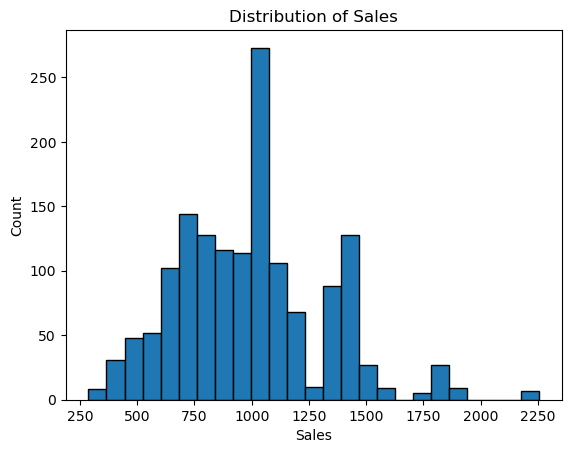

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named "df"
sales_data = Sales['sales']

# Plotting the histogram

plt.hist(sales_data, bins=25, edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Count')
plt.title('Distribution of Sales')
# Sales['sales'].plot(kind='density')
plt.show()


On constate une distribution asymetrique des produits selon  les ventes annuelles l'année passé. la plupart de produit on une vente annuelle inferieur à 1250. De façon specifique, les ventres annuelles  de 1000 à 1083 sont les plus frequentes. Par ailleurs  deux groupes de produits se distingues par leur vente annuelle passée: un  group de produits dont les valeurs annuelle est compris entre 1700 et inferieurs à 2000. Enfin un très faible groupe extrème  avec plus 2000 comme ventes. Cette valeur de ventes est supçonnée de valeur aberrante.

En nous basant seleument sur ce graphique, on dira que l'entreprise devrait se concentrée sur les produits ayant une vente annuelle important, par exemple les produits ayant plus de 1000 comme valeurs de vente annuelles, ou très bien investir sur les facteurs explicateurs de ventes des produits ayant des valeurs de ventes élevées.


In [85]:
Sales['sales'].describe()


83.33333333333333

# Task 4

Describe the relationship between repeat purchases and sales. Your answer must
include a visualization to demonstrate the relationship

*Solution*

In order to describe the relationship  between repeat purchases and sales, we used a boxplot.
![Range](boxplot.png)

To facilitate comparison, the outliers are been  removed by interquartile range method.

![Range](boxplot_no_outlier.png)

We can now focus on the main range of the data. Although repeat purchases are more numerous, the interquartile range of sales is lower compared to the non-repeat purchase category. This is likely due to the fact that while there is a large number of products purchased repeatedly that the sales are mostly lower comparing to non-repeat purchase category.

**Illustration**

![Range](illustration.png)


<AxesSubplot:title={'center':'sales'}, xlabel='[repeat_purchase]'>

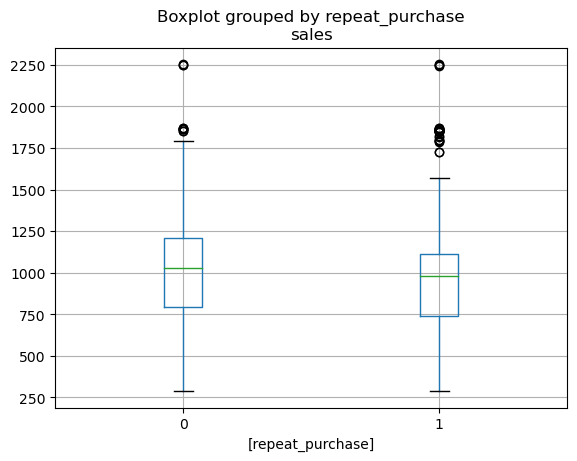

In [87]:
Sales[['sales', 'repeat_purchase']].boxplot(by = 'repeat_purchase',grid=True)

In [88]:
import pandas as pd

sales_data = Sales['sales']

Q1 = sales_data.quantile(0.25)
Q3 = sales_data.quantile(0.75)
IQR = Q3 - Q1

sales_no_outliers = Sales[~((sales_data < (Q1 - 1.5 * IQR)) | (sales_data > (Q3 + 1.5 * IQR)))]

sales_no_outliers.head()


,product_id,category,animal,size,price,sales,rating,repeat_purchase
1,2,Housing,Bird,Medium,35.98,963.60,6,0
2,3,Food,Dog,Medium,31.23,898.30,5,1
3,4,Medicine,Cat,Small,24.95,982.15,6,1
4,5,Housing,Cat,Small,26.18,832.63,7,1
5,6,Housing,Dog,Small,30.77,874.58,7,0


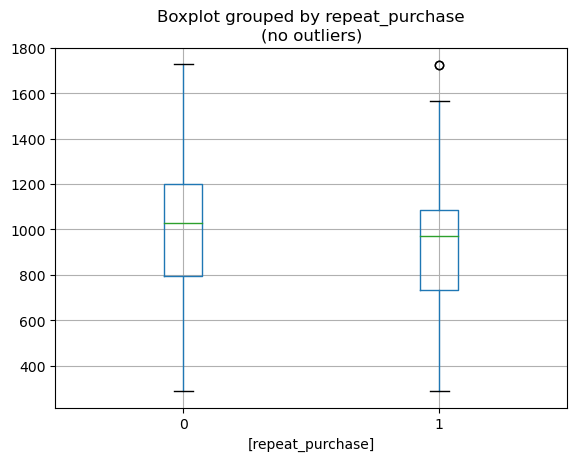

In [86]:
sales_no_outliers[['sales', 'repeat_purchase']].boxplot(by = 'repeat_purchase',grid=True)
plt.title('(no outliers)')
plt.show()

nous pouvons maintenant nous concentrer  sur la plage principale des données.Bien que les produits achétés de façon repetitive soient les plus nombreux, l'ecart interquartile  des ventes est inferieur à celui de la categorie opposée. Cela est probablement du faible que, certes, le nombre important de produits achetés repetitivement mais les ventes sont en majorité inferieures à celles de l'autre categorie.


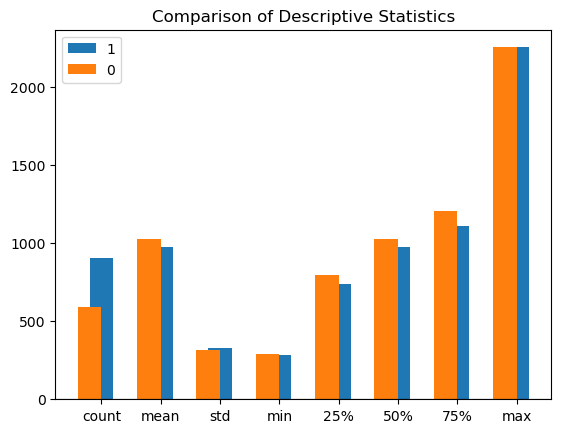

In [89]:

sales_data1 = Sales[Sales.repeat_purchase == '1']['sales']
sales_data0= Sales[Sales.repeat_purchase == '0']['sales']

descriptive_stats = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
values1 = sales_data1.describe()[descriptive_stats].values
values0 = sales_data0.describe()[descriptive_stats].values
x_range = range(len(descriptive_stats))

fig, ax = plt.subplots()

ax.bar(x_range, values1, align='center', width=0.4, label='1')

ax.bar(x_range, values0, align='edge', width=-0.4, label='0')
ax.set_xticks(x_range)
ax.set_xticklabels(descriptive_stats)

ax.axhline(0, color='black', linewidth=0.8)

ax.legend()

plt.title('Comparison of Descriptive Statistics')

plt.show()
